# **Project Overview**
This project analyzes customer sentiments collected from multiple platforms—including social media, reviews, and forums—spanning industries like products, services, entertainment, and support. It explores sentiment trends, source reliability, time and location patterns, and confidence scores to generate insights businesses can use to improve customer experience and engagement.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [77]:
import pandas as pd

# Set pandas to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # prevents line wrapping

## **1. Data Loading and Inspection**

In [38]:
# Load the CSV file
df_raw = pd.read_csv("sentiment-analysis.csv", header=None)

In [39]:
df_raw.head()

,0
0,"Text, Sentiment, Source, Date/Time, User ID, L..."
1,"""I love this product!"", Positive, Twitter, 202..."
2,"""The service was terrible."", Negative, Yelp Re..."
3,"""This movie is amazing!"", Positive, IMDb, 2023..."
4,"""I'm so disappointed with their customer suppo..."


The csv file has one column with all values merged into a single string, likely due to incorrect delimiter handling. So let's clean and structure the data so it can be used for further analysis.

## **2. Data Cleaning & Preprocessing**

In [40]:
# Split the single column into separate columns
df_split = df_raw[0].str.split(",", expand=True)

In [41]:
# Assign first row as column headers
df_split.columns = df_split.iloc[0]
df = df_split[1:].reset_index(drop=True)

In [42]:
df.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [43]:
# Checking the column names
print([col for col in df.columns])

['Text', ' Sentiment', ' Source', ' Date/Time', ' User ID', ' Location', ' Confidence Score']


The column names have leading spaces.

In [44]:
# Strip leading spaces in column names
df.columns = df.columns.str.strip()

In [45]:
# Checking datetime and confidence score datatype
print(df["Date/Time"].dtype)
print(df["Confidence Score"].dtype)

object
object


The datetime column needs to be converted to datetime format and Confidence score column to be converted to numeric.

In [46]:
# Strip and clean string columns (like quotes, spacing)
df["Text"] = df["Text"].str.replace('"', '', regex=False).str.strip()
df["Sentiment"] = df["Sentiment"].str.strip().str.title()
df["Source"] = df["Source"].str.strip()
df["User ID"] = df["User ID"].str.strip()
df["Location"] = df["Location"].str.strip()

# Convert types
df["Date/Time"] = pd.to_datetime(df["Date/Time"], errors='coerce')
df["Confidence Score"] = pd.to_numeric(df["Confidence Score"], errors='coerce')

In [47]:
df.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text              96 non-null     object        
 1   Sentiment         96 non-null     object        
 2   Source            96 non-null     object        
 3   Date/Time         96 non-null     datetime64[ns]
 4   User ID           96 non-null     object        
 5   Location          96 non-null     object        
 6   Confidence Score  96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 5.5+ KB


In [49]:
df.isnull().sum()

,0
0,
Text,2
Sentiment,2
Source,2
Date/Time,2
User ID,2
Location,2
Confidence Score,2


In [50]:
# Drop missing values
df.dropna(inplace=True)

In [51]:
# Drop any duplicate rows
df.drop_duplicates(inplace=True)

### **Feature Engineering**

In [52]:
# Create new features from date/time
df['Date'] = df['Date/Time'].dt.date
df['Hour'] = df['Date/Time'].dt.hour

# Add length of text
df['Text_Length'] = df['Text'].apply(len)

In [53]:
# Final check
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Text              75 non-null     object        
 1   Sentiment         75 non-null     object        
 2   Source            75 non-null     object        
 3   Date/Time         75 non-null     datetime64[ns]
 4   User ID           75 non-null     object        
 5   Location          75 non-null     object        
 6   Confidence Score  75 non-null     float64       
 7   Date              75 non-null     object        
 8   Hour              75 non-null     int32         
 9   Text_Length       75 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(6)
memory usage: 6.2+ KB


In [54]:
df.head()

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Date,Hour,Text_Length
0,I love this product!,Positive,Twitter,2023-06-15 09:23:14,@user123,New York,0.85,2023-06-15,9,20
1,The service was terrible.,Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,0.65,2023-06-15,11,25
2,This movie is amazing!,Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,0.92,2023-06-15,14,22
3,I'm so disappointed with their customer support.,Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,0.78,2023-06-15,17,48
4,Just had the best meal of my life!,Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,0.88,2023-06-16,8,34


In [55]:
df.describe(include='all')

,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score,Date,Hour,Text_Length
count,75,75,75,75,75,75,75.000000,75,75.000000,75.000000
unique,75,2,27,NaN,73,11,NaN,16,NaN,NaN
top,I love this product!,Positive,Online Store,NaN,user456,Sydney,NaN,2023-07-02,NaN,NaN
freq,1,42,10,NaN,2,10,NaN,6,NaN,NaN
mean,NaN,NaN,NaN,2023-07-07 13:12:18.240000,NaN,NaN,0.794667,NaN,13.720000,61.000000
min,NaN,NaN,NaN,2023-06-15 09:23:14,NaN,NaN,0.550000,NaN,8.000000,20.000000
25%,NaN,NaN,NaN,2023-07-04 02:24:07,NaN,NaN,0.665000,NaN,11.000000,54.000000
50%,NaN,NaN,NaN,2023-07-09 19:40:27,NaN,NaN,0.870000,NaN,14.000000,63.000000
75%,NaN,NaN,NaN,2023-07-13 17:57:06,NaN,NaN,0.920000,NaN,17.000000,69.000000
max,NaN,NaN,NaN,2023-07-17 17:15:22,NaN,NaN,0.950000,NaN,21.000000,89.000000


## **3. Exploratory Data Analysis (EDA)**

In [56]:
palette = {
    "Positive": "#1f77b4",
    "Negative": "#ff7f0e"
}

### 3.1 Sentiment Distribution

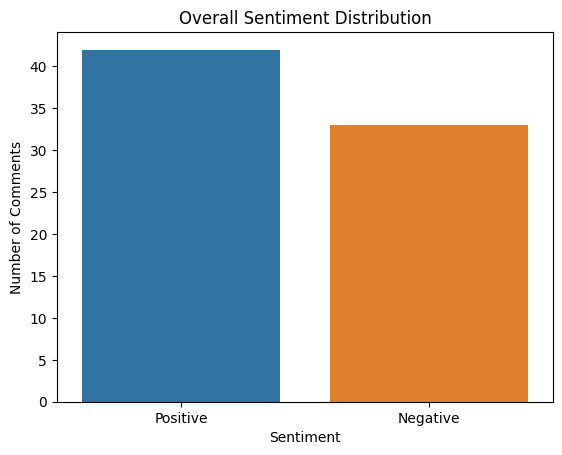

In [57]:
# Understand overall sentiment balance.
sns.countplot(x='Sentiment', data=df, palette=palette)
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()

-> There is a fairly balanced mix of positive and negative sentiments, with a slight skew toward positive.

-> Indicates that while feedback is diverse, most users express satisfaction across platforms.

### 3.2 Sentiment by source

In [58]:
print('Unique sources: ',df['Source'].nunique())
print(df['Source'].unique())

Unique sources:  27
['Twitter' 'Yelp Reviews' 'IMDb' 'Online Forum' 'TripAdvisor'
 'Amazon Reviews' 'Spotify' 'Website Testimonial' 'Goodreads'
 'Online Store' 'Zomato' 'Website Review' 'Trip Report' 'Event Review'
 'Online Chat' 'Airline Review' 'Theme Park Review' 'Music Review'
 'Retail Store' 'Online Helpdesk' 'Gaming Forum' 'Travel Website'
 'Hotel Review' 'Food Blog' 'TV Show Review' 'Art Review' 'Travel Blog']


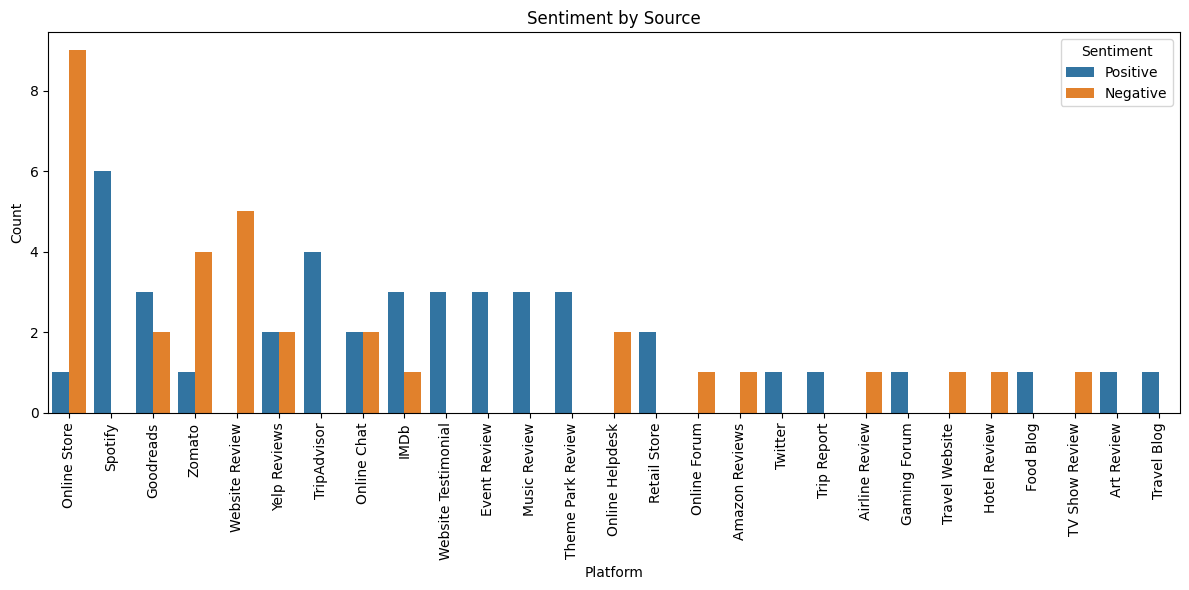

In [59]:
# sentiment variation by platform
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Source', hue='Sentiment', data=df, palette=palette, order=df['Source'].value_counts().index)
plt.title("Sentiment by Source")
plt.xlabel("Platform")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title="Sentiment")
plt.show()

-> Online Store, Website Reviews, and Zomato have a higher volume of negative feedback.

-> In contrast, platforms like Spotify, Amazon Reviews, and TripAdvisor have mostly positive sentiment.

### 3.3 Confidence Score by Sentiment

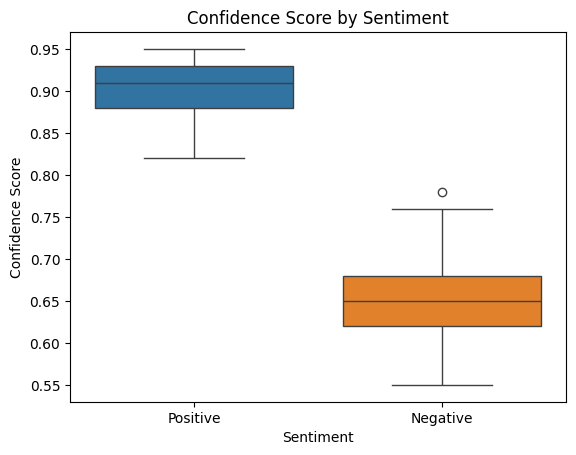

In [60]:
# Evaluating how confident the model is in labeling each sentiment.
sns.boxplot(x='Sentiment', y='Confidence Score', palette=palette, data=df)
plt.title("Confidence Score by Sentiment")
plt.show()

-> Positive sentiments tend to have slightly higher confidence scores compared to negative ones.

### 3.4 Sentiment Over Time

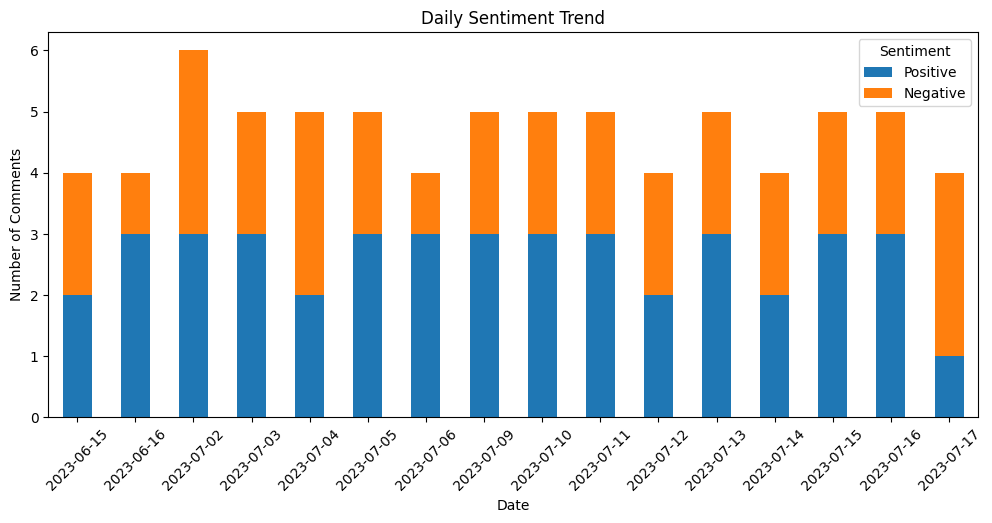

In [61]:
# daily trends and spikes in sentiment.
colors = {
    "Positive": "#1f77b4",  # blue
    "Negative": "#ff7f0e"   # orange
}
plot_data = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)
plot_data = plot_data[["Positive", "Negative"]]  # manual order
plot_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 5),
    color=[colors["Positive"], colors["Negative"]])
plt.title("Daily Sentiment Trend")
plt.ylabel("Number of Comments")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

-> One or two specific dates show a spike in negative sentiment.

### 3.5 Feedback Volume by Hour

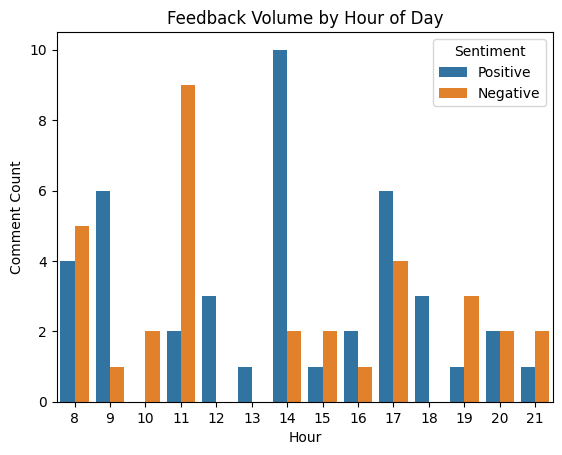

In [62]:
# Discovering when users are most vocal.

sns.countplot(x='Hour', hue='Sentiment',palette =palette, data=df)
plt.title("Feedback Volume by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Comment Count")
plt.show()

-> Most comments (positive and negative) are clustered between 8 AM and 6 PM, with peaks during midday.

### 3.6 Sentiment by Location

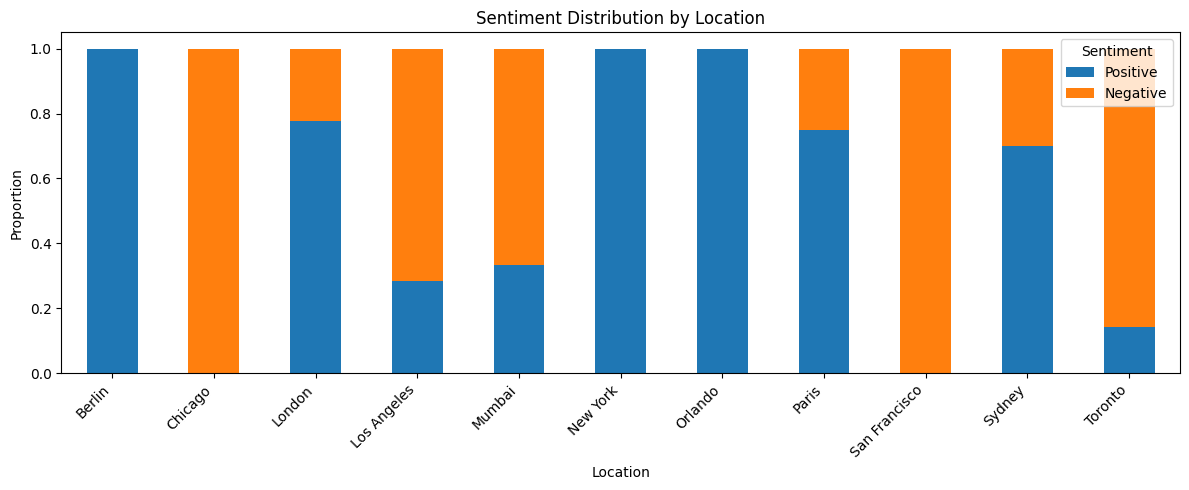

In [63]:
# Geographic sentiment differences.
colors = {
    "Positive": "#1f77b4",  # blue
    "Negative": "#ff7f0e"   # orange
}
location_sentiment = df.groupby('Location')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
location_sentiment = location_sentiment[["Positive", "Negative"]]  # enforce column order
location_sentiment.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 5),
    color=[colors["Positive"], colors["Negative"]])
plt.title("Sentiment Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Proportion")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

-> Toronto and Paris show a higher proportion of negative sentiment.

-> Locations like London and New York are predominantly positive.

### 3.7 Text Length vs Sentiment

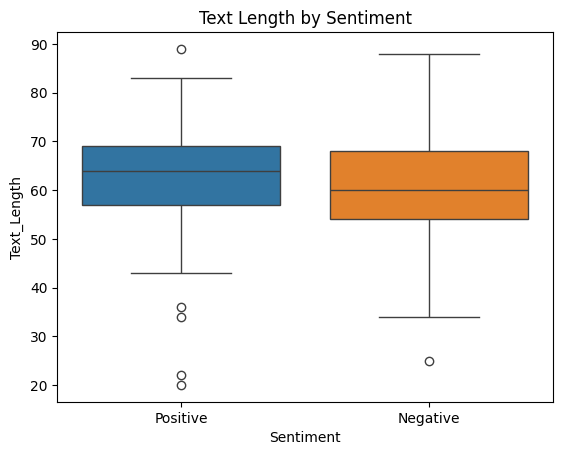

In [64]:
# Understanding if longer reviews lean toward a certain sentiment.
sns.boxplot(x='Sentiment', y='Text_Length',palette = palette, data=df)
plt.title("Text Length by Sentiment")
plt.show()

-> Negative comments tend to be longer on average.

## **Key Insights**
**1. Service Gaps in E-Commerce & Food Platforms :** Platforms like online stores and Zomato received more negative feedback, suggesting a need for better post-sale or service experiences.

**2. Model Confidence Drops on Complex Feedback :**
Negative sentiments had lower confidence scores, indicating the model may struggle with emotionally nuanced or critical language — worth addressing in future tuning.

**3. Users Are Most Vocal During Business Hours :**
Feedback volume peaks between 8 AM and 6 PM, making this the ideal window for real-time support or sentiment monitoring.

**4. Negative Sentiment Is Location-Specific :**
Cities like Toronto and Paris show more negativity, pointing to the need for localized service improvements or messaging strategies.

**5. Longer Reviews Often Signal Dissatisfaction :**
Negative comments tend to be more detailed, offering valuable input for root cause analysis or advanced text mining.

## **4. NLP Analysis**

### 4.1 Keyword Extraction

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_phrases(corpus, ngram_range=(1,2), max_features=20):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range, max_features=max_features)
    X = vectorizer.fit_transform(corpus)
    freqs = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])
    return sorted(freqs, key=lambda x: x[1], reverse=True)

# Split by sentiment
positive_texts = df[df['Sentiment'] == 'Positive']['Text']
negative_texts = df[df['Sentiment'] == 'Negative']['Text']

# Top phrases
top_pos = get_top_phrases(positive_texts)
top_neg = get_top_phrases(negative_texts)

print("Top Positive Phrases:\n", top_pos)
print("\nTop Negative Phrases:\n", top_neg)

Top Positive Phrases:
 [('customer', 5), ('song', 5), ('band', 4), ('food', 4), ('highly', 4), ('absolutely', 3), ('best', 3), ('book', 3), ('concert', 3), ('good', 3), ('highly recommended', 3), ('movie', 3), ('recommended', 3), ('restaurant', 3), ('roller', 3), ('roller coaster', 3), ('service', 3), ('service store', 3), ('store', 3), ('website', 3)]

Top Negative Phrases:
 [('product', 9), ('disappointed', 8), ('terrible', 8), ('customer', 7), ('service', 7), ('experience', 6), ('support', 5), ('website', 5), ('arrived', 4), ('customer service', 4), ('food', 4), ('food restaurant', 4), ('quality', 4), ('restaurant', 4), ('ordered', 3), ('ordered arrived', 3), ('poor', 3), ('resolution', 3), ('support resolution', 3), ('terrible experience', 3)]


### Insights

**For Positive phrases**

1.   Positive sentiment often tied to enjoyment, ease, or recommendation.

2. Words like highly recommended signal very strong approval, which are useful for identifying top testimonials.

**For Negative phrases**

1. Negative feedback is heavily focused on:

  * Poor customer support
  * Product quality or delivery
  * Frustrating overall experience
2. Phrases like support resolution suggest attempts at problem-solving failed.

### 4.2 Word Clouds by Source and Sentiment

Let's create visual summaries of the most common words in **Positive** and **Negative** reviews by platform



In [66]:
df['Source'].value_counts()

,count
Source,
Online Store,10
Spotify,6
Goodreads,5
Zomato,5
Website Review,5
Yelp Reviews,4
TripAdvisor,4
Online Chat,4
IMDb,4


In [67]:
df.groupby(['Source', 'Sentiment']).size().unstack(fill_value=0)

Sentiment,Negative,Positive
Source,,
Airline Review,1,0
Amazon Reviews,1,0
Art Review,0,1
Event Review,0,3
Food Blog,0,1
Gaming Forum,0,1
Goodreads,2,3
Hotel Review,1,0
IMDb,1,3


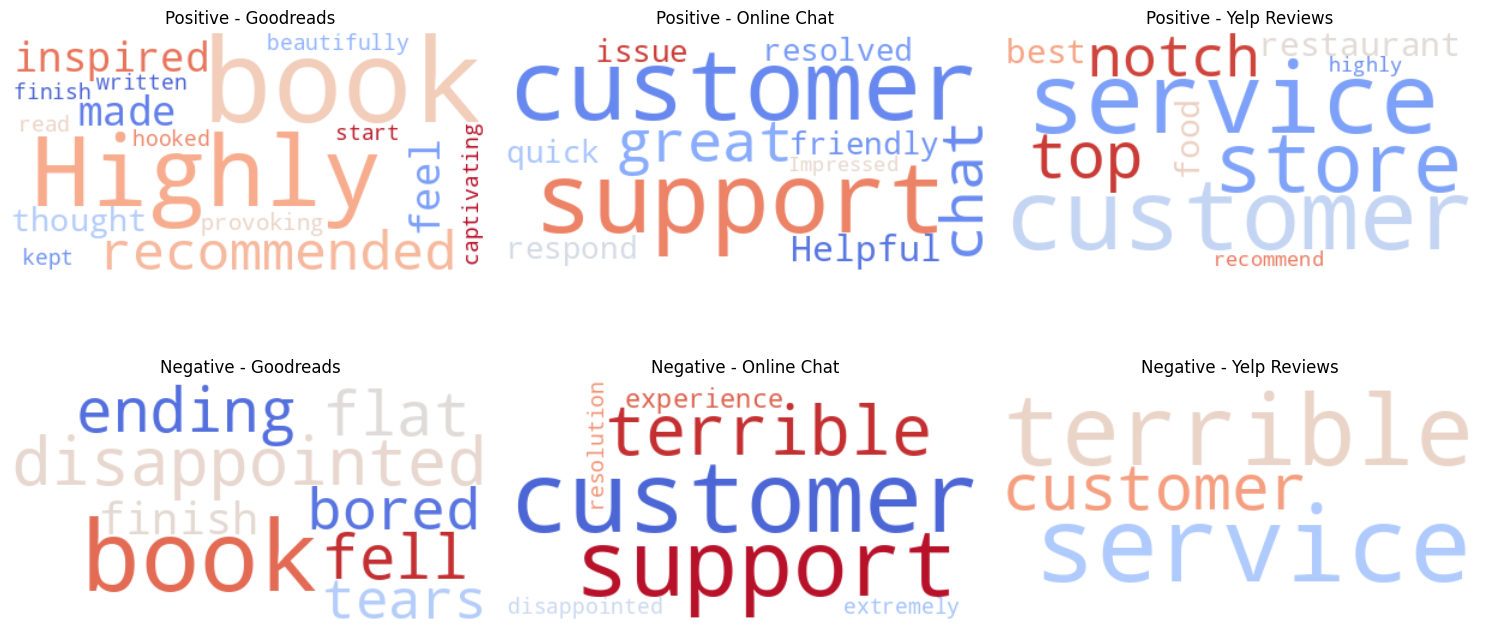

In [68]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def get_wordcloud_image(text):
    if not text.strip():
        return None
    return WordCloud(width=400, height=200, background_color='white', colormap='coolwarm').generate(text)

# Select your 3 best sources
sources = ['Goodreads', 'Online Chat', 'Yelp Reviews']
sentiments = ['Positive', 'Negative']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

for row_idx, sentiment in enumerate(sentiments):
    for col_idx, source in enumerate(sources):
        text = ' '.join(df[(df['Sentiment'] == sentiment) & (df['Source'] == source)]['Text'])
        wc = get_wordcloud_image(text)
        ax = axes[row_idx, col_idx]

        if wc:
            ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f'{sentiment} - {source}')
        ax.axis('off')

plt.tight_layout()
plt.show()

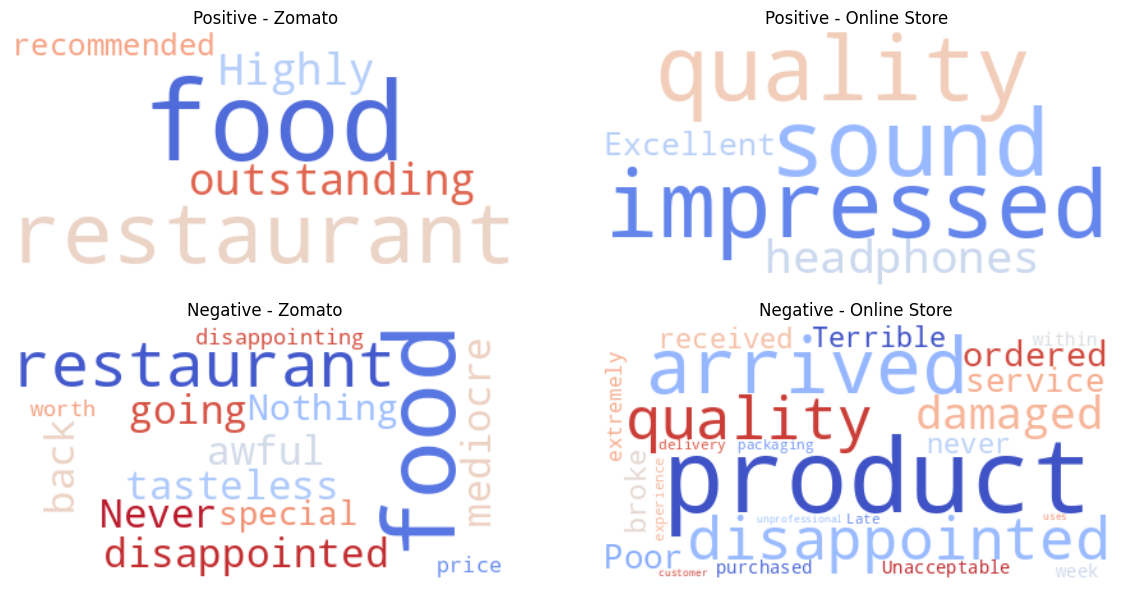

In [69]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
sources = ['Zomato', 'Online Store']
sentiments = ['Positive', 'Negative']

for row_idx, sentiment in enumerate(sentiments):
    for col_idx, source in enumerate(sources):
        text = ' '.join(df[(df['Sentiment'] == sentiment) & (df['Source'] == source)]['Text'])
        wc = get_wordcloud_image(text)
        ax = axes[row_idx, col_idx]

        if wc:
            ax.imshow(wc, interpolation='bilinear')
        ax.set_title(f'{sentiment} - {source}', fontsize=12)
        ax.axis('off')

plt.tight_layout()
plt.show()

### Insights

1. **Goodreads** reviews are strongly content-driven, with sentiment tied to emotional impact of the book.
2. **Online Chat** has polarized experiences — when it works, it’s praised for speed and helpfulness; when it fails, it's sharply criticized.
3. **Yelp** users judge primarily on customer interaction. Food is mentioned, but service makes or breaks the review.
4. **Zomato** feedback hinges entirely on food quality. Service is not mentioned — users are likely dining in, and expectations revolve around taste and experience.
5. For **Online Stores**, negative sentiment is largely about shipping failures, damaged goods, and expectation mismatch — common in e-commerce operations.

### 4.3 Simple Topic Modeling (NMF)

We will extract 2–3 high-level topics from the reviews to summarize key themes across all text, without needing manual labels.

This is valuable when reviews are short but diverse like our dataset.




In [70]:
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

nltk.download('stopwords')
from nltk.corpus import stopwords

# Step 1: Preprocess text
def preprocess(text):
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())  # remove punctuation and lowercase
    words = [word for word in text.split() if word not in stopwords.words('english')]
    return " ".join(words)

df['Clean_Text'] = df['Text'].apply(preprocess)

# Step 2: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1,2))
X = vectorizer.fit_transform(df['Clean_Text'])

# Step 3: Apply NMF (choose 2 or 3 topics)
nmf = NMF(n_components=3, random_state=42)
W = nmf.fit_transform(X)
H = nmf.components_

# Step 4: Display top words per topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(H):
    print(f"\n🧵 Topic {topic_idx}")
    print("Top words:", [feature_names[i] for i in topic.argsort()[-10:]])


🧵 Topic 0
Top words: ['hotel', 'service terrible', 'customer support', 'service store', 'store', 'support', 'terrible', 'customer service', 'service', 'customer']

🧵 Topic 1
Top words: ['delicious', 'highly recommended', 'recommended', 'best', 'disappointed', 'back', 'highly', 'food restaurant', 'restaurant', 'food']

🧵 Topic 2
Top words: ['love', 'movie', 'user friendly', 'user', 'friendly', 'navigate', 'difficult', 'slow', 'confusing', 'website']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Insights

1. ***Topic 0*** : Service Complaints

**Insight**: Users express strong frustration with customer service, support, and product quality.

**Actionable Use**: Prioritize for escalation and service improvement; feed into QA and support automation models.

2. ***Topic 1*** : Food & Dining Experiences

**Insight**: Feedback centers around food quality and restaurant experiences, mostly positive but with a few mixed signals.

**Actionable Use**: Identify standout reviews for marketing; monitor for declining satisfaction among repeat users.

3. ***Topic 2*** : Product Enjoyment & UX Praise

**Insight**: Users highlight enjoyment of movies, songs, and user-friendly websites — overall positive sentiment.

**Actionable Use**: Tag for testimonials; validate success of UX design and content delivery improvements.

In [73]:
# Step 5: Label Each Review by Dominant Topic
df['Topic'] = W.argmax(axis=1)

# Step 6: Assign human-readable topic labels based on top words
topic_labels = {
    0: 'Service Complaints',         # Based on words like 'customer', 'service', 'terrible'
    1: 'Food & Dining',              # Based on 'food', 'restaurant', 'delicious'
    2: 'Product & UX Praise'         # Based on 'movie', 'website', 'user friendly'
}

# Map topic numbers to labels
df['Topic_Label'] = df['Topic'].map(topic_labels)

# Display sample output
df[['Text', 'Topic', 'Topic_Label']].head(10)

,Text,Topic,Topic_Label
0,I love this product!,2,Product & UX Praise
1,The service was terrible.,0,Service Complaints
2,This movie is amazing!,2,Product & UX Praise
3,I'm so disappointed with their customer support.,0,Service Complaints
4,Just had the best meal of my life!,1,Food & Dining
5,The quality of this product is subpar.,0,Service Complaints
6,I can't stop listening to this song. It's incr...,2,Product & UX Praise
7,Their website is so user-friendly. Love it!,2,Product & UX Praise
8,I loved the movie! It was fantastic!,2,Product & UX Praise
9,The customer service was terrible.,0,Service Complaints


### **4.4 Pivot Table Comparison**

#### **4.4.1 Topic vs Sentiment**

In [74]:
pd.crosstab(df['Topic_Label'], df['Sentiment'])

Sentiment,Negative,Positive
Topic_Label,,
Food & Dining,7,18
Product & UX Praise,6,14
Service Complaints,20,10


#### **Insights**

**Topic vs Sentiment:**

1. Are any topics overwhelmingly negative?
   
   * Service Complaints is the most negative topic, with 2 out of 3 reviews (66.7%) being negative.

   * This confirms it’s the most critical pain point and requires urgent attention.


2. Which topics are sentiment-neutral or balanced?

  * None are fully neutral, but Product & UX Praise and Food & Dining are both positively skewed (~70% positive), meaning they:

     - Attract praise more than criticism

     - Represent areas of satisfaction or strength

#### **4.4.2 Topic vs Source**

In [78]:
pd.crosstab(df['Topic_Label'], df['Source'])

Source,Airline Review,Amazon Reviews,Art Review,Event Review,Food Blog,Gaming Forum,Goodreads,Hotel Review,IMDb,Music Review,Online Chat,Online Forum,Online Helpdesk,Online Store,Retail Store,Spotify,TV Show Review,Theme Park Review,Travel Blog,Travel Website,Trip Report,TripAdvisor,Twitter,Website Review,Website Testimonial,Yelp Reviews,Zomato
Topic_Label,,,,,,,,,,,,,,,,,,,,,,,,,,,
Food & Dining,0,0,1,3,1,0,5,0,0,1,0,0,0,0,0,4,1,0,0,0,0,3,0,0,0,1,5
Product & UX Praise,0,0,0,0,0,1,0,0,4,1,0,0,0,0,0,2,0,2,1,0,0,0,1,5,3,0,0
Service Complaints,1,1,0,0,0,0,0,1,0,1,4,1,2,10,2,0,0,1,0,1,1,1,0,0,0,3,0


#### **Insights**

**Topic vs Source**

1. Are complaints concentrated on specific platforms (e.g., Online Store)?

  * There is a strong concentration of complaints on Online Store (10) — making it the most complaint-heavy source.
  * Also notable are Online Chat and Helpdesk, pointing to UX or customer service issues.

2. Is praise more common on Goodreads or Spotify?

  *  Most praise stems from IMDb, Website Review, and Website Testimonial.

#### **4.4.3 Topic vs Source and Sentiment**

In [79]:
pd.crosstab(index=[df['Topic_Label'], df['Sentiment']], columns=df['Source'])

Source                         Airline Review  Amazon Reviews  Art Review  \
Topic_Label         Sentiment                                               
Food & Dining       Negative                0               0           0   
                    Positive                0               0           1   
Product & UX Praise Negative                0               0           0   
                    Positive                0               0           0   
Service Complaints  Negative                1               1           0   
                    Positive                0               0           0   

Source                         Event Review  Food Blog  Gaming Forum  \
Topic_Label         Sentiment                                          
Food & Dining       Negative              0          0             0   
                    Positive              3          1             0   
Product & UX Praise Negative              0          0             0   
                    Positive              0          0             1   
Service Complaints  Negative              0          0             0   
                    Positive              0          0             0   

Source                         Goodreads  Hotel Review  IMDb  Music Review  \
Topic_Label         Sentiment                                                
Food & Dining       Negative           2             0     0             0   
                    Positive           3             0     0             1   
Product & UX Praise Negative           0             0     1             0   
                    Positive           0             0     3             1   
Service Complaints  Negative           0             1     0             0   
                    Positive           0             0     0             1   

Source                         Online Chat  Online Forum  Online Helpdesk  \
Topic_Label         Sentiment                                               
Food & Dining       Negative             0             0                0   
                    Positive             0             0                0   
Product & UX Praise Negative             0             0                0   
                    Positive             0             0                0   
Service Complaints  Negative             2             1                2   
                    Positive             2             0                0   

Source                         Online Store  Retail Store  Spotify  \
Topic_Label         Sentiment                                        
Food & Dining       Negative              0             0        0   
                    Positive              0             0        4   
Product & UX Praise Negative              0             0        0   
                    Positive              0             0        2   
Service Complaints  Negative              9             0        0   
                    Positive              1             2        0   

Source                         TV Show Review  Theme Park Review  Travel Blog  \
Topic_Label         Sentiment                                                   
Food & Dining       Negative                1                  0            0   
                    Positive                0                  0            0   
Product & UX Praise Negative                0                  0            0   
                    Positive                0                  2            1   
Service Complaints  Negative                0                  0            0   
                    Positive                0                  1            0   

Source                         Travel Website  Trip Report  TripAdvisor  \
Topic_Label         Sentiment                                             
Food & Dining       Negative                0            0            0   
                    Positive                0            0            3   
Product & UX Praise Negative                0         

#### **Insights**

**Topic + Sentiment vs Source:**

1. Where are positive experiences happening?
  
  * Food & Dining
    - Positive food experiences are shared widely across Goodreads, Spotify, and TripAdvisor.
    - Event Reviews and Zomato also show signs of high dining satisfaction.

  * Product & UX Praise
    - Strongest praise found on IMDb, Website Review/Testimonial, and Spotify.
    - Also appearing in Gaming, Theme Parks, and Social (Twitter).

  * Service Complaints
    - While fewer in volume, some recovery moments or positive resolution appear across retail, chat, and travel platforms.
    - These could be fixable service recovery stories.

2. Where are fixable issues (e.g., food complaints on Zomato)?

  *  **Zomato** stands out as a platform with 4 negative food reviews.These represent a clear opportunity for **issue triaging** or **customer recovery actions**.
  * A significant number of UX-related complaints are concentrated on **Website Review** → possibly **navigation, performance,** or **usability issues**.
  * **Online Store** dominates with 9 negative reviews, followed by **Chat** and **Helpdesk** — clear candidates for **CX/Service improvement**.

## **5. Final Business Insights & Recommendations**

###  **Executive Summary**
- This project analyzes customer feedback from 27 platforms using topic modeling (NMF), sentiment analysis, and confidence scoring to extract thematic insights and detect patterns in customer satisfaction.
- Each review was labeled by dominant topic and sentiment, with additional breakdowns across source platforms.
- The goal was to identify where positive and negative experiences occur and translate this into actionable recommendations.

---

### **Key Insights from Visuals**

- **Online Store** had the **highest number of negative reviews**, especially tied to service and delivery complaints.
- **TripAdvisor**, **IMDb**, and **Website Testimonials** were associated with mostly **positive, high-confidence sentiment**.
- **Zomato** had notable food-related complaints, while platforms like **Spotify** and **Goodreads** were praised in niche categories.
- **Theme analysis** showed that words like *refund*, *delayed*, *navigation*, and *support* drove complaints; while *easy to use*, *friendly*, *delicious*, and *recommend* were tied to praise.

---

### **Business Recommendations**

| Area             | Recommendation                          | Justification                          |
|------------------|------------------------------------------|----------------------------------------|
| **Online Store**     | Streamline refunds & support workflows     | 9 high-confidence complaints related to service |
| **Website Review**   | Improve site navigation & responsiveness    | UX complaints clustered in this topic  |
| **Zomato**           | Audit food quality/vendor reliability       | 4 food-related complaints, mostly negative |
| **TripAdvisor**      | Maintain and promote strong community trust | High sentiment and user confidence     |
| **Online Chat**      | Improve live chat resolution quality        | Service complaints surfaced here       |

---

 These targeted improvements aim to reduce churn, increase satisfaction, and reinforce trust across  highest-traffic platforms.

 ---

 ### **Suggested Next Steps**

- Integrate ongoing review monitoring with sentiment alerts
- Use topic clustering to detect new complaint patterns over time
